### **Thực hành 4 phân vùng ảnh**
### 2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH
#### 2.1 PHÂN VÙNG THEO HISTOGRAM
##### * Phương pháp otsu

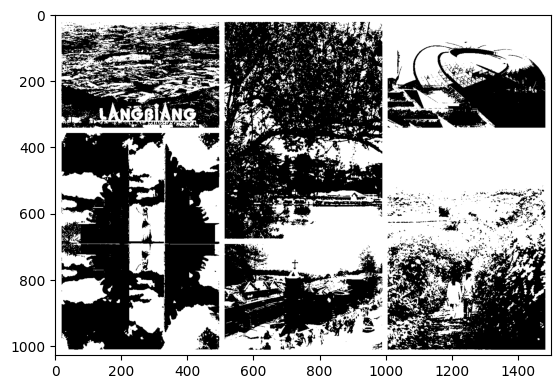

In [6]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd 
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('dalat.jpg').convert('L')

a = np.asarray(data)

thres = threshold_otsu(a)

b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

### Phương pháp Adaptive Thresholding

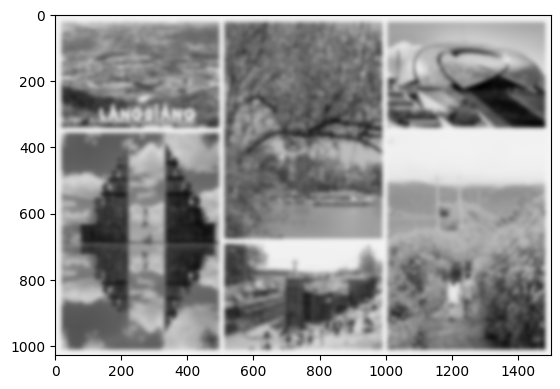

In [2]:
from PIL import Image 
import numpy as np
import imageio.v2 as iio 
import scipy.ndimage as nd 
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('exercise\dalat.jpg').convert('L')
a = np.array(data)
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)

plt.imshow(b)
plt.show()

#### **2.2 Phân vùng theo region**

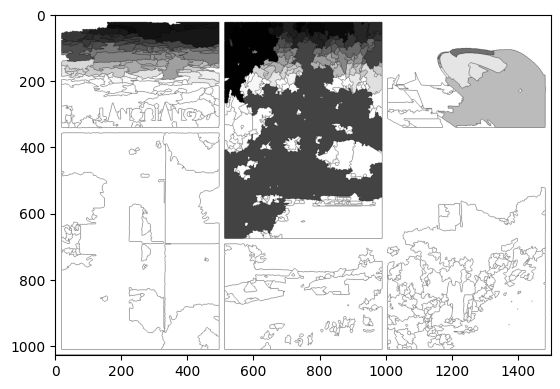

In [4]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('exercise\dalat.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
b2 = cv2.erode(b1, None, iterations = 2)
dist_trans = cv2.distanceTransform(b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

labelled, ncc = label(dt)
labelled = labelled.astype(np.int32)

cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


#### **2.3 Biến đổi đối tượng ảnh** 
##### **2.3.1 Sử dụng binary_dilation**

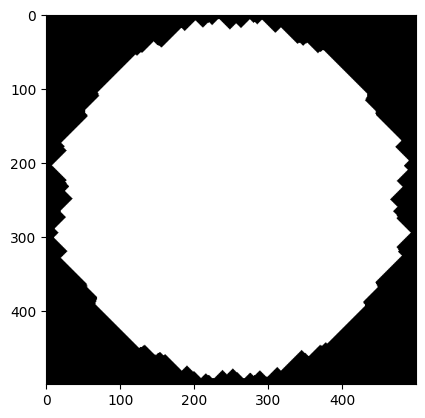

In [5]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
b = nd.binary_dilation(data, iterations = 50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

##### **2.3.2 Sử dụng binary_opening**

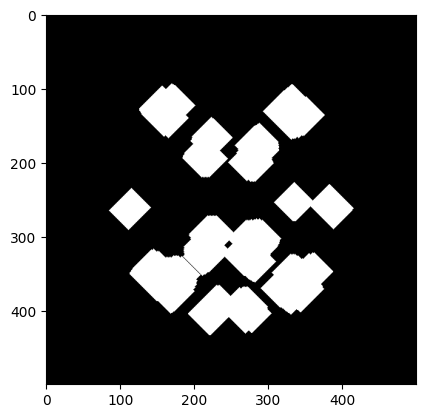

In [8]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

##### **2.3.3 Sử dụng binary_erosion**

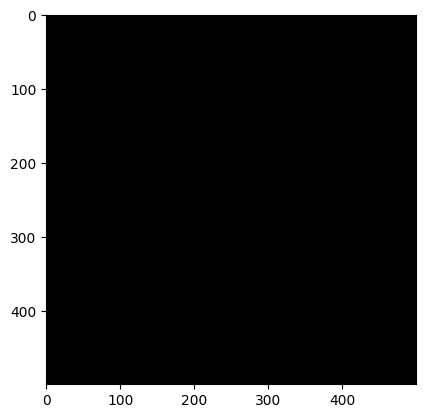

In [9]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

##### **2.3.4 Sử dụng binary_closing**

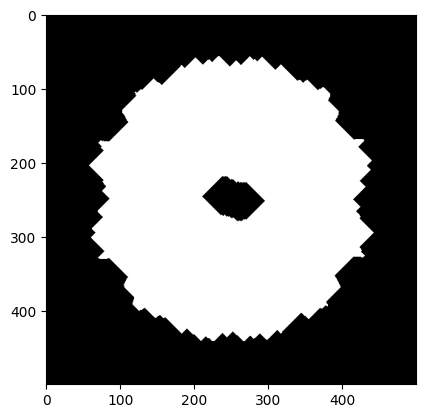

In [10]:
import cv2 
from PIL import Image 
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('Ball.gif').convert('L')
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_closing(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()